In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.data import read_merged
from seminartools.data import read_inflation

# 1. Read data

In [3]:
#only european countries, excluding spain and portugal
df = read_merged(only_countries=["Italy", "Switzerland", "Germany", "Netherlands", "Norway", "Denmark", "Sweden", "France", "Belgium", "United Kingdom"]).reset_index()

#all countries
#df = read_merged().reset_index

In [4]:
df.pivot(index="date", columns="country", values="inflation")

country,Belgium,Denmark,France,Germany,Italy,Netherlands,Norway,Sweden,Switzerland,United Kingdom
date,,,,,,,,,,
1996-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1997-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001095,NaN
1998-01-01,NaN,NaN,0.000000,NaN,0.007032,NaN,NaN,NaN,NaN,NaN
1998-04-01,0.006954,0.008368,NaN,0.002387,0.005587,0.007868,0.005162,0.003654,0.000000,0.011331
1998-07-01,NaN,NaN,NaN,NaN,0.001389,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.033275,0.021536,0.014870,0.018498,0.030160,0.029173,0.007055,0.016158,0.007859,NaN
2022-04-01,0.016949,0.032997,0.022894,0.028500,0.018298,0.024764,0.024113,0.032686,0.015595,NaN
2022-07-01,0.025000,0.023957,0.011638,0.016134,0.021563,0.040519,0.022995,0.030796,0.006718,NaN


# 2. AR model per country

In [5]:
model = FourQuarterAverageModel()
model

In [6]:
from warnings import filterwarnings

filterwarnings("ignore")
model.fit(df)

# 4. H-period ahead forecasting

In [7]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df, "2020-01-01", h=1)
forecast

,date,country,inflation
0,2020-01-01,Belgium,0.001163
1,2020-01-01,Denmark,0.001706
2,2020-01-01,France,0.002897
3,2020-01-01,Germany,0.003133
4,2020-01-01,Italy,0.000737
...,...,...,...
125,2023-01-01,Netherlands,0.027058
126,2023-01-01,Norway,0.016216
127,2023-01-01,Sweden,0.027675
128,2023-01-01,Switzerland,0.007345


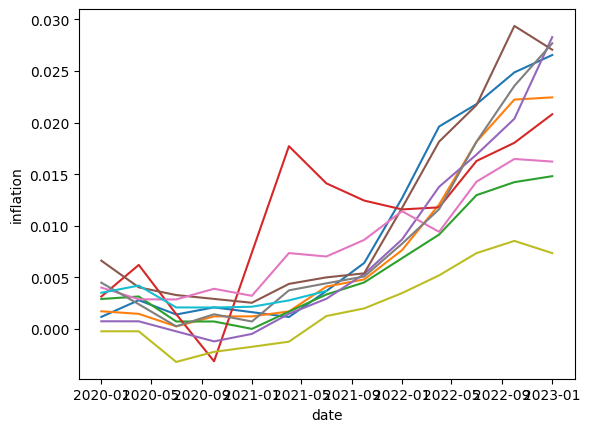

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=forecast, x="date", y="inflation", hue="country")
# turn off legend
plt.legend().remove()

In [9]:
df

,index,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,338,Switzerland,1996-04-01,0.000000,-0.263939,1.500000,3.7,-0.045704,-0.094999,0.030666,-0.088572,-0.034433
1,362,Switzerland,1997-04-01,-0.001095,0.259949,1.000000,4.1,-0.072944,0.083561,-0.035117,-0.000766,-0.036033
2,376,Italy,1998-01-01,0.007032,-0.750889,5.500000,11.9,-0.232105,-0.034915,-0.026870,-0.037470,0.036927
3,377,France,1998-01-01,0.000000,0.975517,3.300000,12.1,-0.232105,-0.034915,-0.026870,-0.037470,0.036927
4,384,Sweden,1998-04-01,0.003654,1.362703,4.266667,8.9,-0.049098,-0.037057,-0.056925,-0.068441,-0.048643
...,...,...,...,...,...,...,...,...,...,...,...,...
890,2163,Denmark,2023-01-01,0.003145,0.906018,2.150000,5.0,-0.020410,-0.585458,0.002037,0.007418,0.043183
891,2164,Netherlands,2023-01-01,-0.013667,-0.494664,3.000000,3.7,-0.020410,-0.585458,0.002037,0.007418,0.043183
892,2165,Switzerland,2023-01-01,0.010084,0.309543,1.166667,4.4,-0.020410,-0.585458,0.002037,0.007418,0.043183
893,2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.020410,-0.585458,0.002037,0.007418,0.043183


In [10]:
forecast

,date,country,inflation
0,2020-01-01,Belgium,0.001163
1,2020-01-01,Denmark,0.001706
2,2020-01-01,France,0.002897
3,2020-01-01,Germany,0.003133
4,2020-01-01,Italy,0.000737
...,...,...,...
125,2023-01-01,Netherlands,0.027058
126,2023-01-01,Norway,0.016216
127,2023-01-01,Sweden,0.027675
128,2023-01-01,Switzerland,0.007345


In [11]:
forecast_merged = forecast.copy().rename(
    columns={"inflation": "pred"}
).merge(
    df[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,date,country,pred,actual
30,2020-10-01,Belgium,0.002086,-0.000920
31,2020-10-01,Denmark,0.001212,-0.000964
32,2020-10-01,France,0.000717,-0.001907
33,2020-10-01,Germany,-0.003139,NaN
34,2020-10-01,Italy,-0.001210,-0.001947
...,...,...,...,...
125,2023-01-01,Netherlands,0.027058,-0.013667
126,2023-01-01,Norway,0.016216,0.006886
127,2023-01-01,Sweden,0.027675,0.014955
128,2023-01-01,Switzerland,0.007345,0.010084


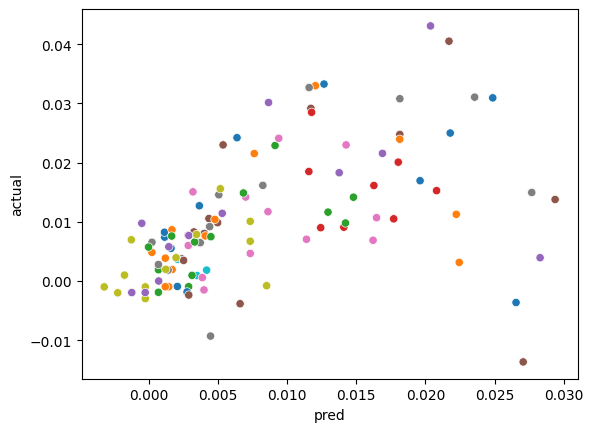

In [12]:
sns.scatterplot(data=forecast_merged, x="pred", y="actual", hue="country")
plt.legend().remove()

In [13]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"]), missing="drop"
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     37.02
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.64e-08
Time:                        12:52:58   Log-Likelihood:                 374.65
No. Observations:                 115   AIC:                            -745.3
Df Residuals:                     113   BIC:                            -739.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.001      3.864      0.000       0.002       0.007
pred           0.6674      0.110      6.084      0.000       0.450       0.885
==============================================================================
Omnibus:                        8.944   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               18.834
Skew:                          -0.125   Prob(JB):                     8.13e-05
Kurtosis:                       4.967   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
tss

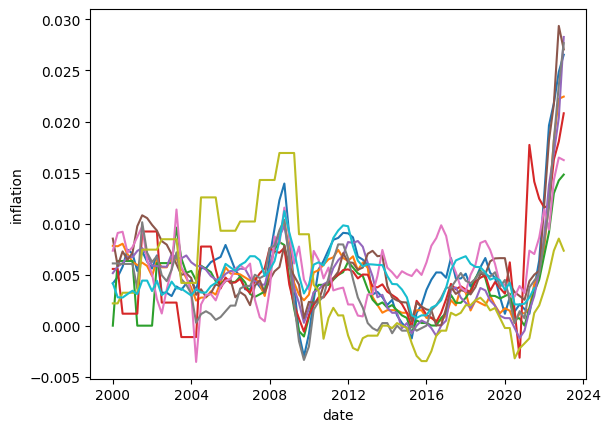

In [15]:
from seminartools.models.utils import make_oos_predictions

sns.lineplot(
    data = make_oos_predictions(lambda: model, df, tss),
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# ARMAX

In [16]:
from seminartools.models.armax_model import ARMAXModel
preds = make_oos_predictions(lambda: ARMAXModel(max_p = 2, max_q = 2), df, tss, progress = True, num_cores = 5)
preds

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Splits: 100%|██████████| 5/5 [00:00<00:00, 84.12it/s]
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood o

,date,country,inflation
0,2004-10-01,Italy,0.004525
1,2004-10-01,France,0.004513
2,2004-10-01,Sweden,0.006102
3,2004-10-01,Denmark,0.007383
4,2004-10-01,United Kingdom,0.104256
...,...,...,...
699,2020-10-01,United Kingdom,0.008986
700,2023-01-01,Germany,0.001353
701,2023-01-01,Netherlands,-0.001668
702,2023-01-01,Norway,-0.012972


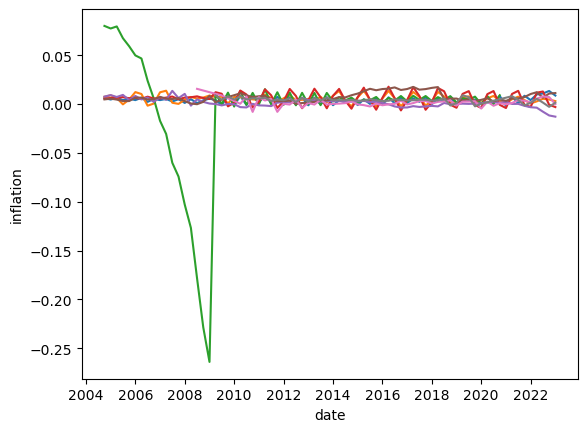

In [178]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# PCA VAR

In [163]:
from seminartools.models.pca_var_model import PCAVARModel
preds = make_oos_predictions(lambda: PCAVARModel(), df, tss, progress = True, num_cores = 1)
preds

ValueError: zero-size array to reduction operation maximum which has no identity

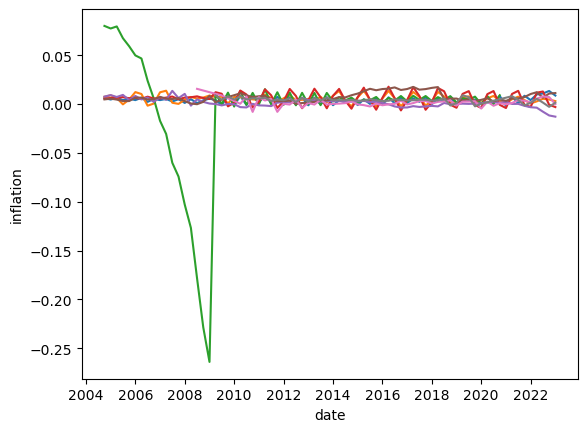

In [179]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# UCSVSS

In [180]:
from seminartools.models.uc_sv_ss_model import UCSVSSModel

preds = make_oos_predictions(
    lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
    df,
    tss,
    progress=True,
    num_cores=1,
)
preds

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x000001330FD80D10>)


Splits:  20%|██        | 1/5 [00:24<01:38, 24.66s/it]

Fitted!


Splits: 100%|██████████| 5/5 [00:25<00:00,  5.04s/it]


,inflation,country,date
0,0.000330,Switzerland,1999-07-01
1,0.002711,Sweden,1999-07-01
2,0.005543,Denmark,2000-01-01
3,0.008639,United Kingdom,2000-01-01
4,0.001592,Germany,1999-07-01
...,...,...,...
739,0.004205,United Kingdom,2020-10-01
740,0.018359,Germany,2023-01-01
741,0.016431,Netherlands,2023-01-01
742,0.011903,Norway,2023-01-01


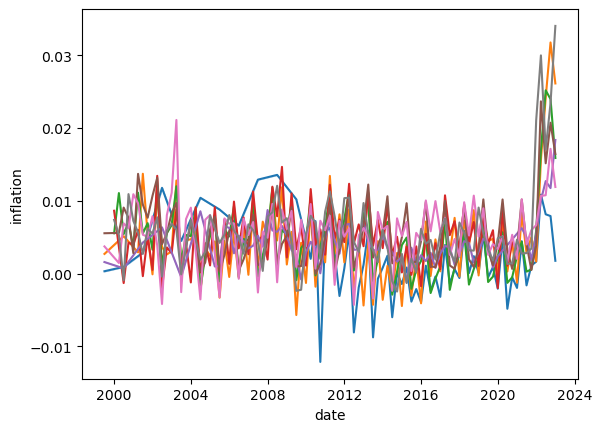

In [181]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# RE model

In [182]:
from seminartools.models.random_effects_model import RandomEffectsModel

preds = make_oos_predictions(
    lambda: RandomEffectsModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

Splits: 100%|██████████| 5/5 [00:00<00:00, 11.67it/s]


,date,country,inflation
0,2000-01-01,Belgium,0.004563
1,2000-01-01,Denmark,0.007922
2,2000-01-01,United Kingdom,0.003807
3,2000-04-01,Belgium,0.003660
4,2000-04-01,Denmark,0.007017
...,...,...,...
651,2023-01-01,Germany,0.004036
652,2023-01-01,Netherlands,0.005004
653,2023-01-01,Norway,0.003576
654,2023-01-01,Sweden,0.002090


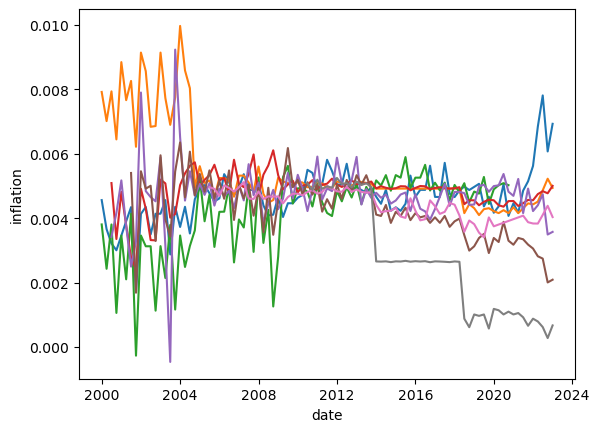

In [183]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# Distance based model

In [184]:
from seminartools.models.distance_model import DistanceModel

preds = make_oos_predictions(
    lambda: DistanceModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

Splits: 100%|██████████| 5/5 [00:00<?, ?it/s]


,country,inflation,date
0,Belgium,0.005455,2000-01-01
1,Denmark,0.008259,2000-01-01
2,United Kingdom,0.004876,2000-01-01
3,Belgium,0.003171,2000-04-01
4,Denmark,0.006602,2000-04-01
...,...,...,...
651,Germany,0.005327,2023-01-01
652,Netherlands,0.007224,2023-01-01
653,Norway,0.002393,2023-01-01
654,Sweden,0.000420,2023-01-01


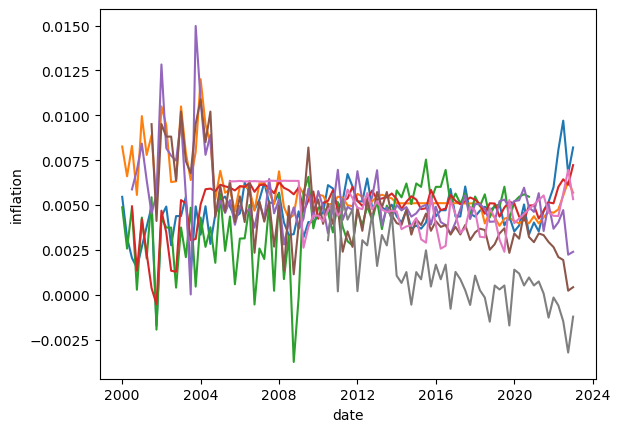

In [185]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [186]:
model = DistanceModel()
model.fit(df[df["date"] <= "2000-01-01"])
model

Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


In [ ]:
pd.Series(model.country_intercepts.mean(axis = 0), index= model.countries.tolist() + ["mean"]).sort_values()

United Kingdom   -0.820578
France           -0.548171
Belgium          -0.230832
Netherlands      -0.063331
Switzerland      -0.062865
Italy             0.032029
mean              0.112387
Germany           0.168159
Norway            0.735608
Sweden            0.898440
Denmark           1.015414
dtype: float64

<Axes: xlabel='date'>

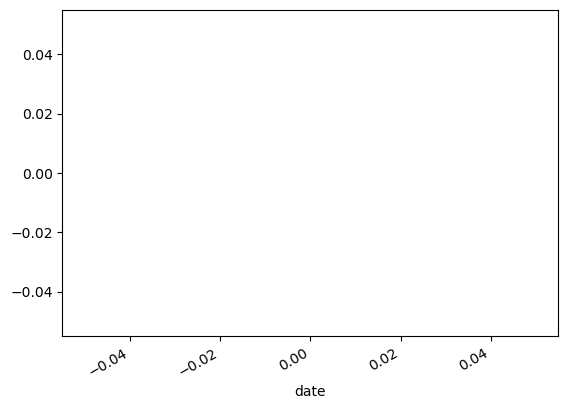

In [187]:
df.query("country == 'South Africa'").set_index("date")["inflation"].plot()

In [188]:
preds = h_period_ahead_forecast(model, df, "2000-01-01", h=1)
preds

,country,inflation,date
0,Belgium,0.005659,2000-01-01
1,Denmark,0.008066,2000-01-01
2,United Kingdom,0.004145,2000-01-01
3,Belgium,0.003833,2000-04-01
4,Denmark,0.006161,2000-04-01
...,...,...,...
651,Germany,0.001351,2023-01-01
652,Netherlands,-0.008771,2023-01-01
653,Norway,0.000532,2023-01-01
654,Sweden,-0.000983,2023-01-01


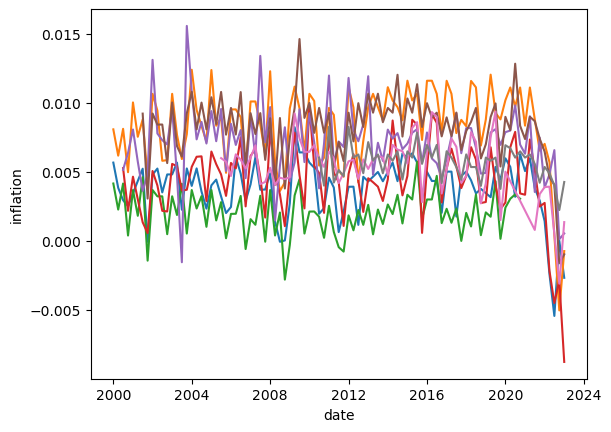

In [189]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [190]:
preds.query("inflation > 1")

,country,inflation,date


In [ ]:
model._create_lagged_variables(df.set_index("date")).query("country == 'Spain' and date == '2020-04-01'").T

date
index
country
inflation
gdp_growth
interest_rate
unemployment_rate
commodity_CRUDE_PETRO
commodity_iNATGAS
commodity_iAGRICULTURE
commodity_iMETMIN


In [191]:
import numpy as np
from scipy.stats import percentileofscore

feature_df = model._create_lagged_variables(df.set_index("date"))
# we calculate the quantiles for all float64 dtypes
cols = feature_df.select_dtypes("float64").columns
specific_feature_map = feature_df.query("country == 'Spain' and date == '2020-04-01'")

percentile_columns = pd.DataFrame(index=specific_feature_map.index)

# Calculating percentile ranks for each float column in 'specific_feature_map'.
for col in cols:
    # This will hold the percentile ranks for the current column.
    col_percentiles = []
    
    # Iterate through each row in 'specific_feature_map' to calculate the percentile rank of its value in 'feature_df'.
    for value in specific_feature_map[col]:
        percentile_rank = percentileofscore(feature_df[col].dropna(), value, kind='rank')
        col_percentiles.append(percentile_rank)
    
    # Assigning calculated percentile ranks to the new columns.
    percentile_columns[f'{col}'] = col_percentiles

percentile_columns["country"] = specific_feature_map["country"]

pd.concat([
    specific_feature_map,
    percentile_columns
], keys = ["feature_value", "percentile"]).T

index
country
inflation
gdp_growth
interest_rate
unemployment_rate
commodity_CRUDE_PETRO
commodity_iNATGAS
commodity_iAGRICULTURE
commodity_iMETMIN
commodity_iPRECIOUSMET


In [192]:
preds.query("country == 'Switzerland' and date == '2010-07-01'").T

,268
country,Switzerland
inflation,0.00602
date,2010-07-01 00:00:00


# Get scores

In [17]:
from seminartools.models.utils import get_stats
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.models.pca_var_model import PCAVARModel
from seminartools.models.armax_model import ARMAXModel
from seminartools.models.uc_sv_ss_model import UCSVSSModel
from seminartools.models.random_effects_model import RandomEffectsModel
from seminartools.models.distance_model import DistanceModel
from seminartools.models.mucsvss_model import MUCSVSSModel

muc_model = MUCSVSSModel(num_particles=100008, stochastic_seasonality=True)
muc_model.load_from_disk("../../models/mucsvss_model_100008_deterministic_all.pkl")
muc_model

I0000 00:00:1712580785.836843 3929702 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [18]:
exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]

stats = get_stats(
    [
        ("4qa", lambda: FourQuarterAverageModel()),
        #("pca_var", lambda: PCAVARModel()),
        ("ar", lambda: ARMAXModel(max_p=2, max_q=0)),
        (
            "arx",
            lambda: ARMAXModel(max_p=2, max_q=0, exogenous_columns=exog_columns),
        ),
        ("arma", lambda: ARMAXModel(max_p=2, max_q=2)),
        (
            "armax",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns=exog_columns),
        ),
        (
            "uc_sv",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=False),
        ),
        (
            "uc_sv_ss",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
        ),
        ("random_effects", lambda: RandomEffectsModel()),
        (
            "random_effects_x",
            lambda: RandomEffectsModel(exogenous_columns=exog_columns),
        ),
        ("distance", lambda: DistanceModel()),
        ("distance_x", lambda: DistanceModel(exogenous_columns=exog_columns)),
        ("mucsvss", lambda: muc_model),
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)
stats

/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/hom

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x7fe7113eb810>)


100%|██████████| 10/10 [00:00<00:00, 31.73it/s]


Fitted!
Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x7fe6add54e90>)


100%|██████████| 10/10 [00:00<00:00, 56.29it/s]


Fitted!


/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided

Creating regression coefficients: 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]


Fitting model on the full dataset... (model=<seminartools.models.mucsvss_model.MUCSVSSModel object at 0x7fe720c471d0>)
Fitted!


,mse,mae,r2,mz_intercept,mz_slope,mz_r2
uc_sv_ss,0.000035,0.003923,0.180049,0.001851,0.646613,0.258164
4qa,0.000037,0.004383,0.139453,0.001716,0.676252,0.182031
uc_sv,0.000042,0.004636,0.021095,0.002396,0.540177,0.084217
random_effects,0.000044,0.004737,-0.006925,0.002970,0.404915,0.004721
distance,0.000045,0.004852,-0.030313,0.003314,0.332631,0.009364
random_effects_x,0.000046,0.004828,-0.074822,0.003761,0.259416,0.008700
ar,0.000047,0.004853,-0.008691,0.002689,0.474646,0.028095
distance_x,0.000062,0.005742,-0.438285,0.004795,0.007586,0.000023
mucsvss,0.000112,0.007700,-1.584524,0.004843,0.003453,0.000019
arx,0.000317,0.010415,-5.819571,0.004892,-0.014131,0.001129


In [22]:
stats

,mse,mae,r2,mz_intercept,mz_slope,mz_r2
uc_sv_ss,0.000035,0.003923,0.180049,0.001851,0.646613,0.258164
4qa,0.000037,0.004383,0.139453,0.001716,0.676252,0.182031
uc_sv,0.000042,0.004636,0.021095,0.002396,0.540177,0.084217
random_effects,0.000044,0.004737,-0.006925,0.002970,0.404915,0.004721
distance,0.000045,0.004852,-0.030313,0.003314,0.332631,0.009364
random_effects_x,0.000046,0.004828,-0.074822,0.003761,0.259416,0.008700
ar,0.000047,0.004853,-0.008691,0.002689,0.474646,0.028095
distance_x,0.000062,0.005742,-0.438285,0.004795,0.007586,0.000023
mucsvss,0.000112,0.007700,-1.584524,0.004843,0.003453,0.000019
arx,0.000317,0.010415,-5.819571,0.004892,-0.014131,0.001129


In [23]:
#generate latex code for the stats table
stats.to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n & mse & mae & r2 & mz_intercept & mz_slope & mz_r2 \\\\\n\\midrule\nuc_sv_ss & 0.000035 & 0.003923 & 0.180049 & 0.001851 & 0.646613 & 0.258164 \\\\\n4qa & 0.000037 & 0.004383 & 0.139453 & 0.001716 & 0.676252 & 0.182031 \\\\\nuc_sv & 0.000042 & 0.004636 & 0.021095 & 0.002396 & 0.540177 & 0.084217 \\\\\nrandom_effects & 0.000044 & 0.004737 & -0.006925 & 0.002970 & 0.404915 & 0.004721 \\\\\ndistance & 0.000045 & 0.004852 & -0.030313 & 0.003314 & 0.332631 & 0.009364 \\\\\nrandom_effects_x & 0.000046 & 0.004828 & -0.074822 & 0.003761 & 0.259416 & 0.008700 \\\\\nar & 0.000047 & 0.004853 & -0.008691 & 0.002689 & 0.474646 & 0.028095 \\\\\ndistance_x & 0.000062 & 0.005742 & -0.438285 & 0.004795 & 0.007586 & 0.000023 \\\\\nmucsvss & 0.000112 & 0.007700 & -1.584524 & 0.004843 & 0.003453 & 0.000019 \\\\\narx & 0.000317 & 0.010415 & -5.819571 & 0.004892 & -0.014131 & 0.001129 \\\\\narma & 0.000336 & 0.007558 & -6.224779 & 0.004694 & 0.028207 & 0.005246 \\\\\n